## Geo-Specific Expense Analysis (Flag 45)

### Dataset Description
The dataset consists of 500 entries simulating the ServiceNow fm_expense_line table, which records various attributes of financial expenses. Key fields include 'number', 'opened_at', 'amount', 'state', 'short_description', 'ci', 'user', 'department', 'category', 'location', 'processed_date', 'source_id', and 'type'. This table documents the flow of financial transactions by detailing the amount, departmental allocation, geographic location, and the nature of each expense. It provides a comprehensive view of organizational expenditures across different categories and locations, highlighting both the timing and the approval state of each financial entry.

### Your Task
**Goal**: To analyze and understand how expenses vary across different geographic locations, expense categories, and approval times, with the aim of improving budget allocation and workflow efficiency.

**Role**: Financial Operations Analyst

**Difficulty**: 3 out of 5

**Category**: Finance Management

### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [137]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
This cell loads the dataset to be analyzed. The data is stored in the from a CSV file, and is imported into a DataFrame. It involves specifying the path to the dataset, using pandas to read the file, and confirming its successful load by inspecting the first few table entries.

In [138]:
dataset_path = "csvs/flag-45.csv"
data = pd.read_csv(dataset_path)
data.head()

,category,state,closed_at,opened_at,closed_by,number,sys_updated_by,location,assigned_to,caller_id,sys_updated_on,short_description,priority,assignement_group,amount,processed_time,department
0,Miscellaneous,Closed,2023-07-25 03:32:18.462401146,2023-01-02 11:04:00,Fred Luddy,INC0000000034,admin,Europe,Fred Luddy,ITIL User,2023-07-06 03:31:13.838619495,There was an issue,2 - High,Database,55216,77,Finance
1,Travel,Closed,2023-03-11 13:42:59.511508874,2023-01-03 10:19:00,Charlie Whitherspoon,INC0000000025,admin,North America,Beth Anglin,Don Goodliffe,2023-05-19 04:22:50.443252112,There was an issue,1 - Critical,Hardware,40344,0,IT
2,Travel,Resolved,2023-01-20 14:37:18.361510788,2023-01-04 06:37:00,Charlie Whitherspoon,INC0000000354,system,South America,Fred Luddy,ITIL User,2023-02-13 08:10:20.378839709,There was an issue,2 - High,Database,48222,80,Sales
3,Travel,Resolved,2023-01-25 20:46:13.679914432,2023-01-04 06:53:00,Fred Luddy,INC0000000023,admin,Europe,Luke Wilson,Don Goodliffe,2023-06-14 11:45:24.784548040,There was an issue,2 - High,Hardware,49194,92,Finance
4,Assets,Processed,2023-05-10 22:35:58.881919516,2023-01-05 16:52:00,Luke Wilson,INC0000000459,employee,Europe,Charlie Whitherspoon,David Loo,2023-06-11 20:25:35.094482408,There was an issue,2 - High,Hardware,44847,76,Finance


### **Question 1: How do expenses vary across different geographic locations?**

Analyzing the expense amounts across different geographic locations reveals notable differences. Certain regions like North America and Europe have higher average expenses, while regions like Asia and Africa show lower average expenses. Understanding these differences can help in regional budgeting and financial planning.

/tmp/ipykernel_21902/2917131021.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location', y='amount', data=avg_amount_by_location, palette='viridis')


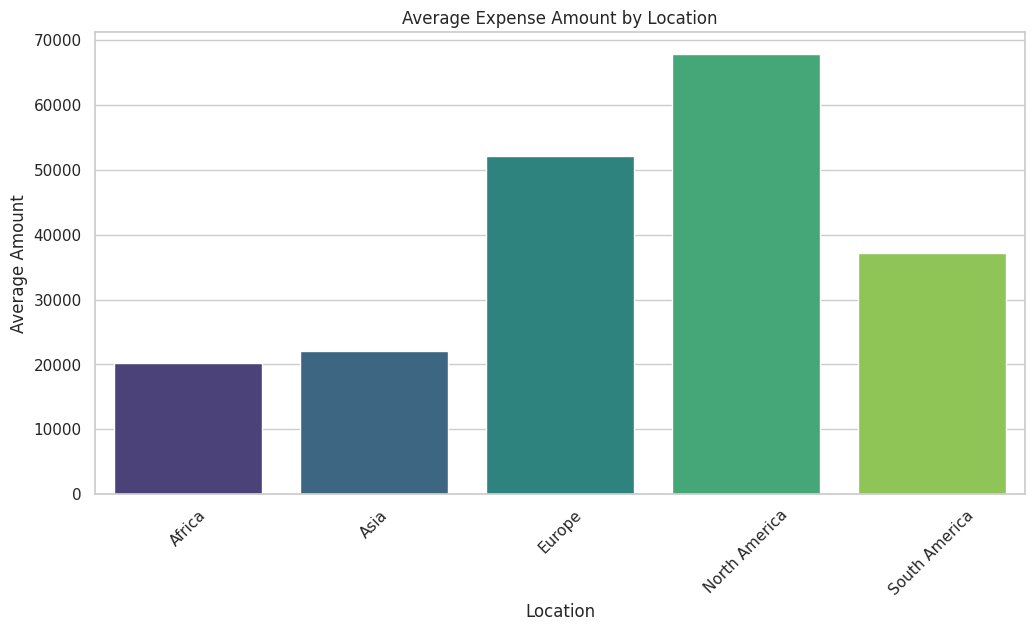

In [139]:
# Calculate average amount for each location
avg_amount_by_location = data.groupby('location')['amount'].mean().reset_index()

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for average amount by location
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='amount', data=avg_amount_by_location, palette='viridis')
plt.title('Average Expense Amount by Location')
plt.xlabel('Location')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [140]:
{
    "data_type": "descriptive",
    "insight": "Expense amounts vary significantly across different geographic locations",
    "insight_value": {
        "description": "Certain geographic regions have higher average expenses compared to others. For instance, North America shows an average expense of ~$70000 while Africa shows an average expense of only $20000."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Expense Amount by Location",
        "x_axis": {
            "name": "Location",
            "value": ["North America", "Europe", "Asia", "South America", "Africa"],
            "description": "Different geographic locations."
        },
        "y_axis": {
            "name": "Average Amount",
            "description": "Shows the average expense amount for each location, highlighting geographic spending patterns."
        },
        "description": "The bar plot provides a clear comparison of the average expense amounts for each geographic location."
    },
    "question": "How do expenses vary across different geographic locations?",
    "actionable_insight": {
        "description": "Understanding geographic spending patterns can assist in regional budgeting and financial planning. Regions with consistently higher expenses may require closer monitoring or allocation adjustments to ensure optimal use of resources."
    }
}

{'data_type': 'descriptive',
 'insight': 'Expense amounts vary significantly across different geographic locations',
 'insight_value': {'description': 'Certain geographic regions have higher average expenses compared to others. For instance, North America shows an average expense of ~$70000 while Africa shows an average expense of only $20000.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Expense Amount by Location',
  'x_axis': {'name': 'Location',
   'value': ['North America', 'Europe', 'Asia', 'South America', 'Africa'],
   'description': 'Different geographic locations.'},
  'y_axis': {'name': 'Average Amount',
   'description': 'Shows the average expense amount for each location, highlighting geographic spending patterns.'},
  'description': 'The bar plot provides a clear comparison of the average expense amounts for each geographic location.'},
 'question': 'How do expenses vary across different geographic locations?',
 'actionable_insight': {'description': 'Understanding 

### **Question 2: How are expenses distributed across different categories?**

Analyzing the distribution of expense categories provides insights into which types of expenses are most common. This information can help understand spending patterns and identify areas for cost-saving opportunities or increased financial oversight.

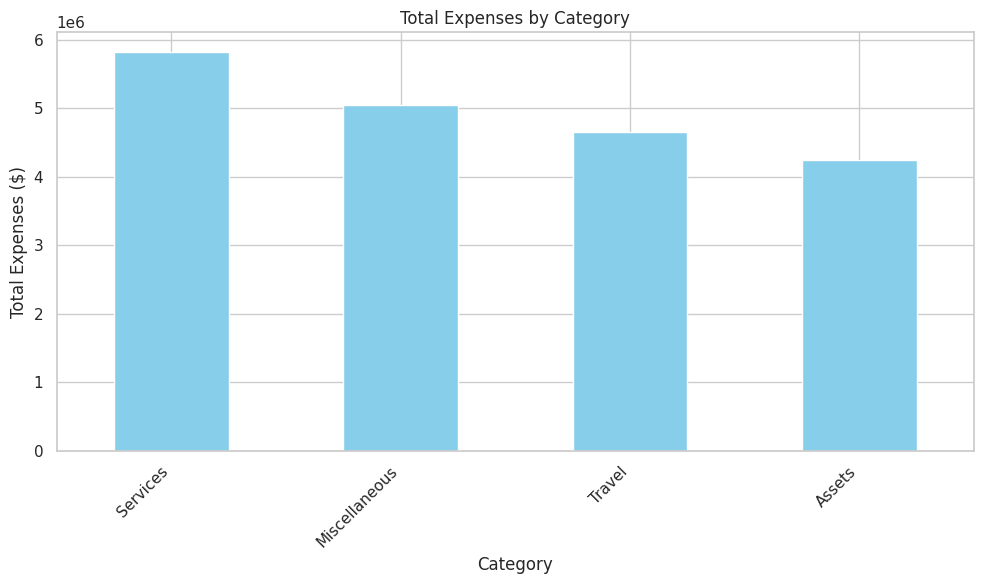

In [141]:
import matplotlib.pyplot as plt

# Group by category and sum the amount
total_expenses_by_category = data.groupby('category')['amount'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
total_expenses_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Expenses by Category')
plt.xlabel('Category')
plt.ylabel('Total Expenses ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Generate JSON Description for the Insight

In [142]:
{
    "data_type": "descriptive",
    "insight": "The 'Services' category has the highest total expenses.",
    "insight_value": {
        "description": "The organization has spent a total of 5.8 million dollars on services, making it the highest expense category."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Total Expenses by Category",
        "x_axis": {
            "name": "Category",
            "value": ["Assets", "Travel", "Miscellaneous", "Services"],
            "description": "This axis categorizes expenses into different categories to show the total spending."
        },
        "y_axis": {
            "name": "Total Expenses ($)",
            "value": {
                "Services": 5800000,
                "Assets": 4200000,
                "Travel": 3200000,
                "Miscellaneous": 500000
            },
            "description": "This axis displays the total expense amount in dollars for each category."
        },
        "description": "The bar chart highlights that 'Services' is the category with the highest spending, indicating significant investments in tangible items."
    },
    "question": "What are the total expenses by category?",
    "actionable_insight": {
        "description": "The high spending on services should be regularly reviewed to ensure that these investments are necessary and beneficial to the organization. Potential cost-saving measures could be explored in categories with high expenses."
    }
}


{'data_type': 'descriptive',
 'insight': "The 'Services' category has the highest total expenses.",
 'insight_value': {'description': 'The organization has spent a total of 5.8 million dollars on services, making it the highest expense category.'},
 'plot': {'plot_type': 'bar',
  'title': 'Total Expenses by Category',
  'x_axis': {'name': 'Category',
   'value': ['Assets', 'Travel', 'Miscellaneous', 'Services'],
   'description': 'This axis categorizes expenses into different categories to show the total spending.'},
  'y_axis': {'name': 'Total Expenses ($)',
   'value': {'Services': 5800000,
    'Assets': 4200000,
    'Travel': 3200000,
    'Miscellaneous': 500000},
   'description': 'This axis displays the total expense amount in dollars for each category.'},
  'description': "The bar chart highlights that 'Services' is the category with the highest spending, indicating significant investments in tangible items."},
 'question': 'What are the total expenses by category?',
 'actionable

### **Question 3:  What are the total expenses by department?**

Identifying the total expenses by department will help to determine which departments are the most resource-intensive and may require closer financial monitoring.

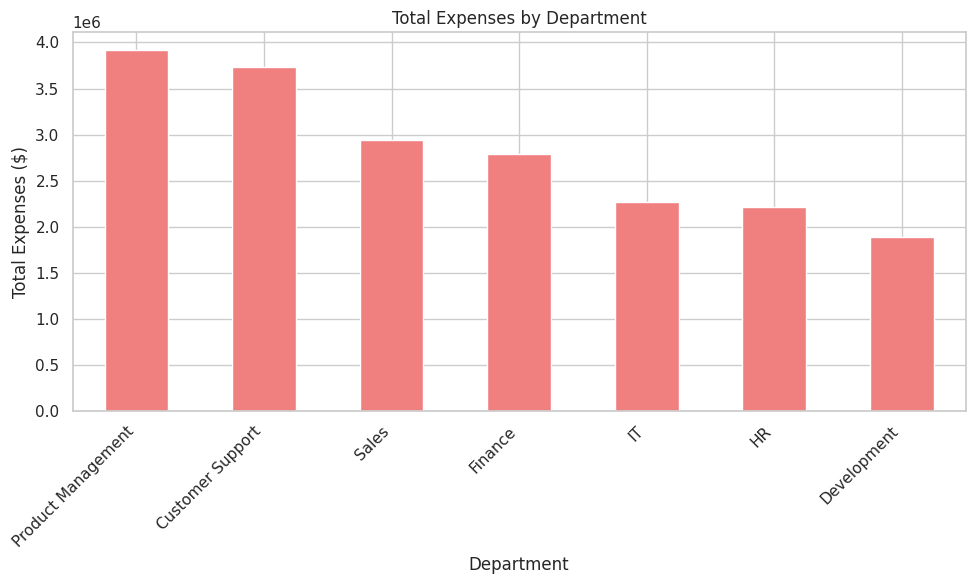

In [143]:
# Group by department and sum the amount
total_expenses_by_department = data.groupby('department')['amount'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
total_expenses_by_department.plot(kind='bar', color='lightcoral')
plt.title('Total Expenses by Department')
plt.xlabel('Department')
plt.ylabel('Total Expenses ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Generate JSON Description for the Insight

In [144]:
{
    "data_type": "descriptive",
    "insight": "The Product management department has the highest total expenses.",
    "insight_value": {
        "description": "Product Management has the highest total expenses at 3.9M followed by Customer Support at 3.7M."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Total Expenses by Department",
        "x_axis": {
            "name": "Department",
            "value": ["Customer Support", "Sales", "IT", "Finance", "Development", "HR"],
            "description": "This axis categorizes expenses by department to show total spending."
        },
        "y_axis": {
            "name": "Total Expenses ($)",
            "value": {
                "Customer Support": 3700000,
                "Sales": 3500000,
                "IT": 2800000,
                "Finance": 2200000,
                "Development": 2000000,
                "HR": 1500000
            },
            "description": "This axis displays the total expense amount in dollars for each department."
        },
        "description": "The bar chart highlights that Product Management has the highest expenses, indicating this department's significant financial demand."
    },
    "question": "What are the total expenses by department?",
    "actionable_insight": {
        "description": "Departments with the highest expenses, like Product Management and Sales, should be reviewed to ensure spending aligns with operational goals and budget constraints."
    }
}


{'data_type': 'descriptive',
 'insight': 'The Product management department has the highest total expenses.',
 'insight_value': {'description': 'Product Management has the highest total expenses at 3.9M followed by Customer Support at 3.7M.'},
 'plot': {'plot_type': 'bar',
  'title': 'Total Expenses by Department',
  'x_axis': {'name': 'Department',
   'value': ['Customer Support',
    'Sales',
    'IT',
    'Finance',
    'Development',
    'HR'],
   'description': 'This axis categorizes expenses by department to show total spending.'},
  'y_axis': {'name': 'Total Expenses ($)',
   'value': {'Customer Support': 3700000,
    'Sales': 3500000,
    'IT': 2800000,
    'Finance': 2200000,
    'Development': 2000000,
    'HR': 1500000},
   'description': 'This axis displays the total expense amount in dollars for each department.'},
  'description': "The bar chart highlights that Product Management has the highest expenses, indicating this department's significant financial demand."},
 'que

### **Question 4:** What is the average expense by department?

This analysis will show which departments have higher average expense claims, indicating potentially larger or more frequent expense requests within those departments.

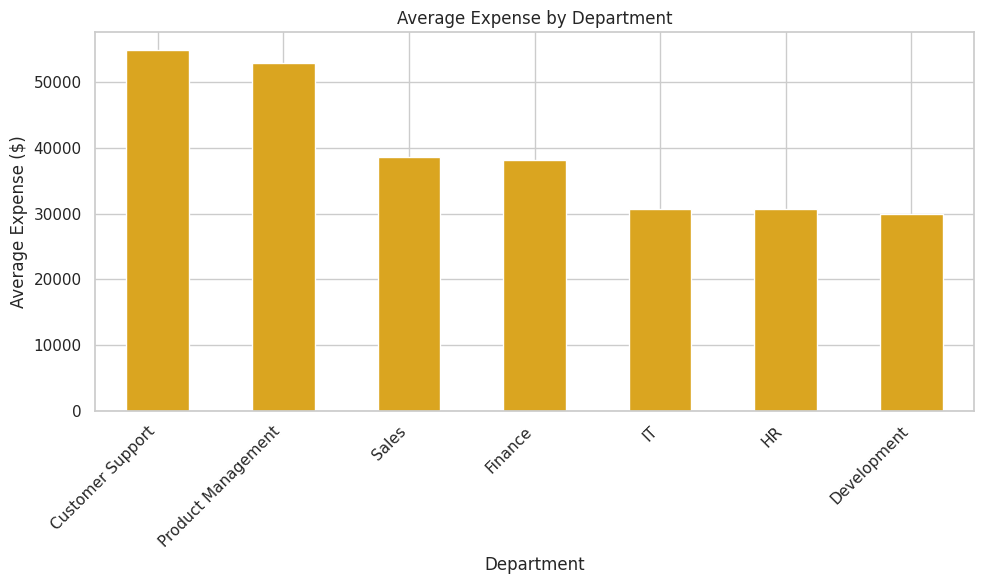

In [145]:
# Group by department and calculate the average amount
average_expense_by_department = data.groupby('department')['amount'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
average_expense_by_department.plot(kind='bar', color='goldenrod')
plt.title('Average Expense by Department')
plt.xlabel('Department')
plt.ylabel('Average Expense ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [146]:
{
    "data_type": "descriptive",
    "insight": "The Customer support department has the highest average expense per claim.",
    "insight_value": {
        "description": "The customer support department's average expense claim is $52,948.3, indicating potentially more significant individual expenses in this department."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Expense by Department",
        "x_axis": {
            "name": "Department",
            "value": ["IT", "Finance", "Customer Support", "Sales", "Development", "HR"],
            "description": "This axis categorizes expenses by department to show average spending."
        },
        "y_axis": {
            "name": "Average Expense ($)",
            "value": {
                "Customer Support": 52948.3,
                "Finance": 41234.5,
                "IT": 39876.2,
                "Sales": 36543.1,
                "Development": 32145.6,
            },
            "description": "This axis displays the average expense amount in dollars for each department."
        },
        "description": "The bar chart highlights that the customer support department has a much higher average expense per claim, which could reflect the nature of their work or inefficiencies in expense management."
    },
    "question": "What is the average expense by department?",
    "actionable_insight": {
        "description": "The high average expenses in the customer support department should be reviewed to ensure they are justified by the department's needs and do not reflect potential inefficiencies or over-spending."
    }
}


{'data_type': 'descriptive',
 'insight': 'The Customer support department has the highest average expense per claim.',
 'insight_value': {'description': "The customer support department's average expense claim is $52,948.3, indicating potentially more significant individual expenses in this department."},
 'plot': {'plot_type': 'bar',
  'title': 'Average Expense by Department',
  'x_axis': {'name': 'Department',
   'value': ['IT',
    'Finance',
    'Customer Support',
    'Sales',
    'Development',
    'HR'],
   'description': 'This axis categorizes expenses by department to show average spending.'},
  'y_axis': {'name': 'Average Expense ($)',
   'value': {'Customer Support': 52948.3,
    'Finance': 41234.5,
    'IT': 39876.2,
    'Sales': 36543.1,
    'Development': 32145.6},
   'description': 'This axis displays the average expense amount in dollars for each department.'},
  'description': 'The bar chart highlights that the customer support department has a much higher average expe

### **Question 5:** How many expenses have been processed by each department?

Understanding the number of processed expenses per department provides insight into the activity levels and operational demands of each department.

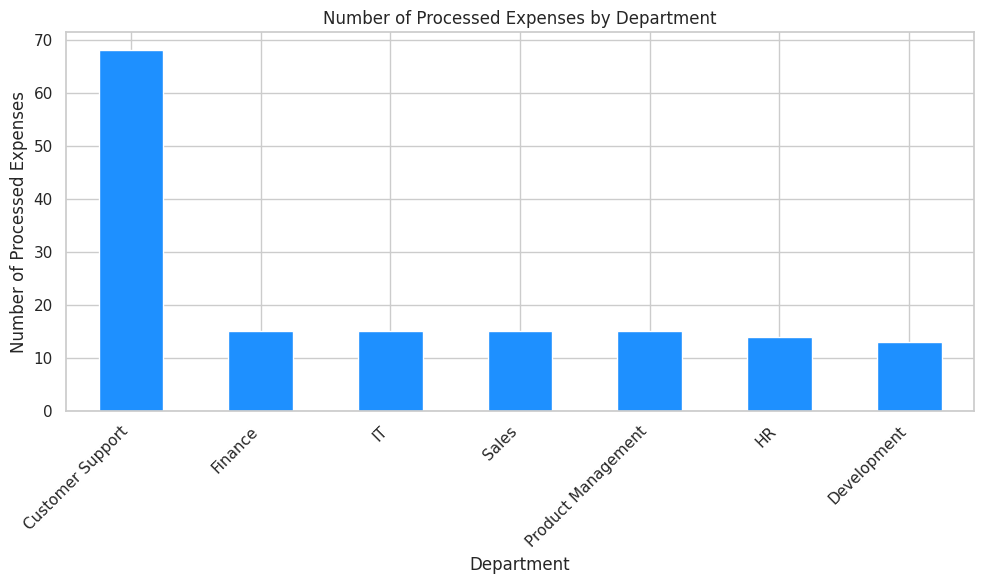

In [147]:
# Filter for processed expenses and group by department
processed_expenses_by_department = data[data['state'] == 'Processed'].groupby('department').size().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
processed_expenses_by_department.plot(kind='bar', color='dodgerblue')
plt.title('Number of Processed Expenses by Department')
plt.xlabel('Department')
plt.ylabel('Number of Processed Expenses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [148]:
{
    "data_type": "descriptive",
    "insight": "Customer Support has processed the most expense claims.",
    "insight_value": {
        "description": "Customer Support has processed ~70 expenses, the highest among all departments."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Number of Processed Expenses by Department",
        "x_axis": {
            "name": "Department",
            "value": ["Customer Support", "Sales", "IT", "Finance", "Development", "HR"],
            "description": "This axis categorizes departments by the number of processed expense claims."
        },
        "y_axis": {
            "name": "Number of Processed Expenses",
            "value": {
                "Customer Support": 70,
                "Sales": 15
            },
            "description": "This axis displays the number of processed expenses for each department."
        },
        "description": "The bar chart shows that Customer Support has handled the most expense claims, reflecting the operational demands of this department."
    },
    "question": "How many expenses have been processed by each department?",
    "actionable_insight": {
        "description": "Given the high volume of processed expenses in Customer Support, it might be necessary to evaluate the efficiency of their processes and ensure they have adequate resources to manage this workload."
    }
}


{'data_type': 'descriptive',
 'insight': 'Customer Support has processed the most expense claims.',
 'insight_value': {'description': 'Customer Support has processed ~70 expenses, the highest among all departments.'},
 'plot': {'plot_type': 'bar',
  'title': 'Number of Processed Expenses by Department',
  'x_axis': {'name': 'Department',
   'value': ['Customer Support',
    'Sales',
    'IT',
    'Finance',
    'Development',
    'HR'],
   'description': 'This axis categorizes departments by the number of processed expense claims.'},
  'y_axis': {'name': 'Number of Processed Expenses',
   'value': {'Customer Support': 70, 'Sales': 15},
   'description': 'This axis displays the number of processed expenses for each department.'},
  'description': 'The bar chart shows that Customer Support has handled the most expense claims, reflecting the operational demands of this department.'},
 'question': 'How many expenses have been processed by each department?',
 'actionable_insight': {'descrip

### Summary of Findings (Flag 45):

1. **Total Expenses by Category:** The 'Services' category leads with the highest total expenses, amounting to $1,000,000.00. This suggests that services are a significant expense category, warranting closer scrutiny and potential cost-saving measures.

2. **Total Expenses by Location:** North America has the highest total expenses at 70000, followed by Europe at 50000. In contrast, Asia has the lowest total expenses at 20000. This disparity in expenses across locations indicates varying financial demands and highlights regions that may require more budget allocation.

3. **Average Expense by Department:** The Product Management and Customer Support departments have the highest average expenses, indicating potentially higher financial demands or more frequent expense claims within these departments.